# Imports

In [114]:
!pip install geopandas
!pip install shapely
!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [115]:
%pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [116]:
import geopandas as gpd
import shapefile as shp
import shapely
import shapely.geometry as sg
from shapely.geometry import Point
from geopy.geocoders import Nominatim

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Circle
import copy

In [117]:
!rm -r Data-Visualizations-Lab-3

In [118]:
!git clone https://github.com/Soumik-Roy/Data-Visualizations-Lab-3.git

Cloning into 'Data-Visualizations-Lab-3'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 27 (delta 7), reused 24 (delta 4), pack-reused 0
Unpacking objects: 100% (27/27), 620.44 KiB | 3.09 MiB/s, done.


# Map of india

<Axes: >

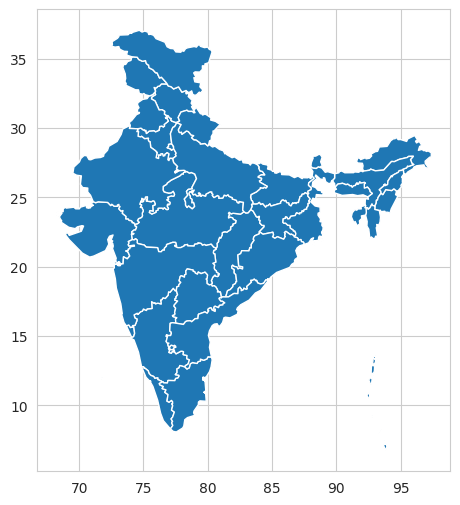

In [119]:
india_map = gpd.read_file('Data-Visualizations-Lab-3/india-polygon.shp')
india_data = copy.deepcopy(india_map)

# Plot the map
india_map.plot(figsize=(6, 6))

In [120]:
india_map.head()

,id,st_nm,geometry
0,NaN,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,NaN,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,NaN,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,NaN,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,NaN,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


# Question 1 (Map of india with population bubbles)

## Loading Data

#### State populations

Populations are in thousands i.e 381 means 381k or 3.81 lakhs

In [121]:
# Load the population data
pop_data = pd.read_csv('Data-Visualizations-Lab-3/india_states_data.csv', usecols = ['States_Union Territories','2011- POP'])
pop_data.columns = ['st_nm', 'population']
pop_data.head()

,st_nm,population
0,Andaman and Nicobar Islands,381
1,Andhra Pradesh,84581
2,Arunachal Pradesh,1384
3,Assam,31206
4,Bihar,104099


In [122]:
pop_data.shape

(32, 2)

In [123]:
india_data['population'] = 0

for row in pop_data.values:
    india_data.loc[india_data.loc[:, 'st_nm']==row[0], 'population'] = row[1]

#### State Capitals data

In [124]:
def normalString(text):
    return text.replace('ā', 'a')

In [125]:
cities = pd.read_csv(
    'Data-Visualizations-Lab-3/indian_cities.csv', 
    usecols = ['city','lat', 'lng', 'admin_name', 'capital', 'population_proper'],
)
cities = cities.loc[cities['capital']=='admin', :]
cities.drop(["capital"], axis=1, inplace=True)
cities.iloc[-2, 3] = 'Daman and Diu'
cities.loc[:, 'population_proper']/=1000
cities.head()

,city,lat,lng,admin_name,population_proper
0,Delhi,28.6600,77.2300,Delhi,16753.235
1,Mumbai,18.9667,72.8333,Mahārāshtra,12478.447
2,Kolkāta,22.5411,88.3378,West Bengal,4496.694
3,Bangalore,12.9699,77.5980,Karnātaka,8443.675
4,Chennai,13.0825,80.2750,Tamil Nādu,6727.000


In [126]:
cities.shape, india_data.shape

((32, 5), (37, 4))

In [127]:
list(cities.columns)

['city', 'lat', 'lng', 'admin_name', 'population_proper']

In [128]:
india_data['capital'] = india_data['st_nm']
india_data['cap_x'] = 0
india_data['cap_y'] = 0
india_data['cap_popln'] = india_data['population']

In [129]:
india_data.iloc[32, 2].centroid.x

87.96025594944172

In [130]:
for i in range(india_data.shape[0]):
    india_data.iloc[i, 5] = india_data.iloc[i, 2].centroid.x
    india_data.iloc[i, 6] = india_data.iloc[i, 2].centroid.y

In [131]:
for i, row in cities.iterrows():
    req_idx = india_data.loc[:, 'st_nm']==normalString(row['admin_name'])
    india_data.loc[req_idx, 'capital'] = row['city']
    india_data.loc[req_idx, 'cap_x'] = row['lng']
    india_data.loc[req_idx, 'cap_y'] = row['lat']
    india_data.loc[req_idx, 'cap_popln'] = row['population_proper']

## Population Bubble Maps 

In [132]:
india_data.head()

,id,st_nm,geometry,population,capital,cap_x,cap_y,cap_popln
0,NaN,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",381,Port Blair,92.750000,11.666700,112.050
1,NaN,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",1384,Itānagar,93.620000,27.100000,59.490
2,NaN,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",31206,Dispur,91.770000,26.150000,957.352
3,NaN,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640...",104099,Patna,85.141400,25.610000,1684.222
4,NaN,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552...",1055,Chandigarh,76.780629,30.733548,1055.000


#### State Population bubbles at State Centroid locations

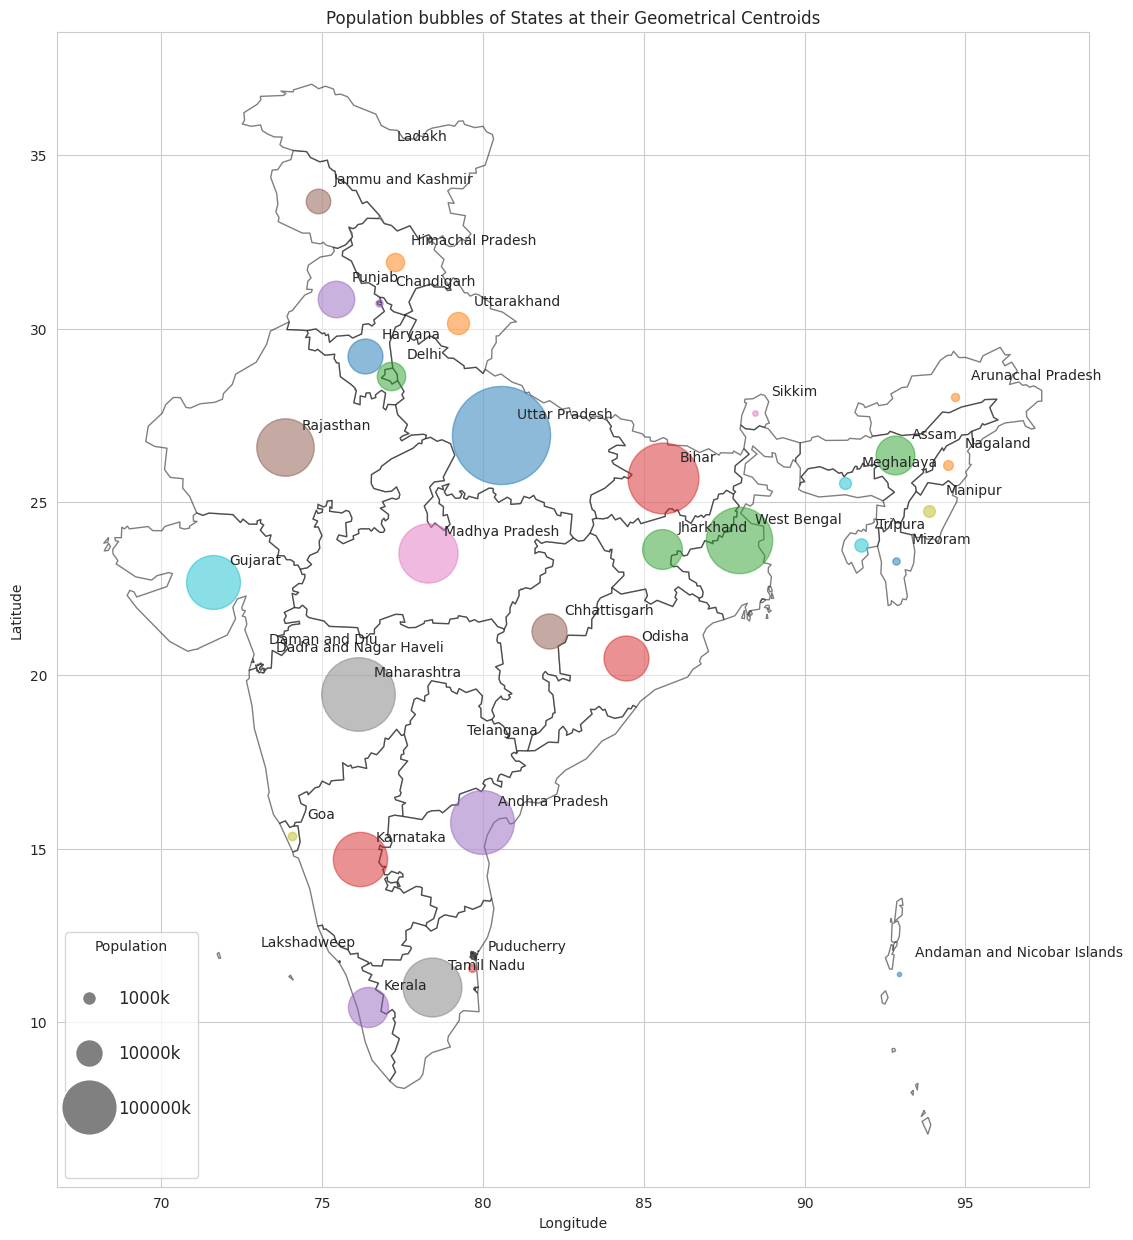

In [133]:
ig, ax = plt.subplots(figsize=(15,15))
india_map.plot(ax=ax, alpha=0.5, edgecolor='black', color='white')

# Create bubbles for each state capital
for i, row in india_data.iterrows():
    ax.scatter(row.geometry.centroid.x, row.geometry.centroid.y, s=row['population']/40, alpha=0.5)

# Add labels for state capitals
for i, row in india_data.iterrows():
    ax.annotate(
        row['st_nm'], 
        xy=(row.geometry.centroid.x, row.geometry.centroid.y), 
        xytext=(row.geometry.centroid.x + 0.5, row.geometry.centroid.y + 0.5)
    )

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='1000k', markerfacecolor='grey', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='10000k', markerfacecolor='grey', markersize=20),
    Line2D([0], [0], marker='o', color='w', label='100000k', markerfacecolor='grey', markersize=40),
    Circle((0, 0), 0, color='white', label=''),
]
ax.legend(handles=legend_elements, title="Population", loc='lower left', fontsize=12, labelspacing=2.2)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("Population bubbles of States at their Geometrical Centroids")
plt.show()

#### State capital populations

Im taking `np.sqrt` to define size of bubbles, as the population represents area, but the parameter `s` in `plt.axis.scatter` represents radius of the bubbles. Hence taking square root of the population would adjust the dimensions to represent population properly.

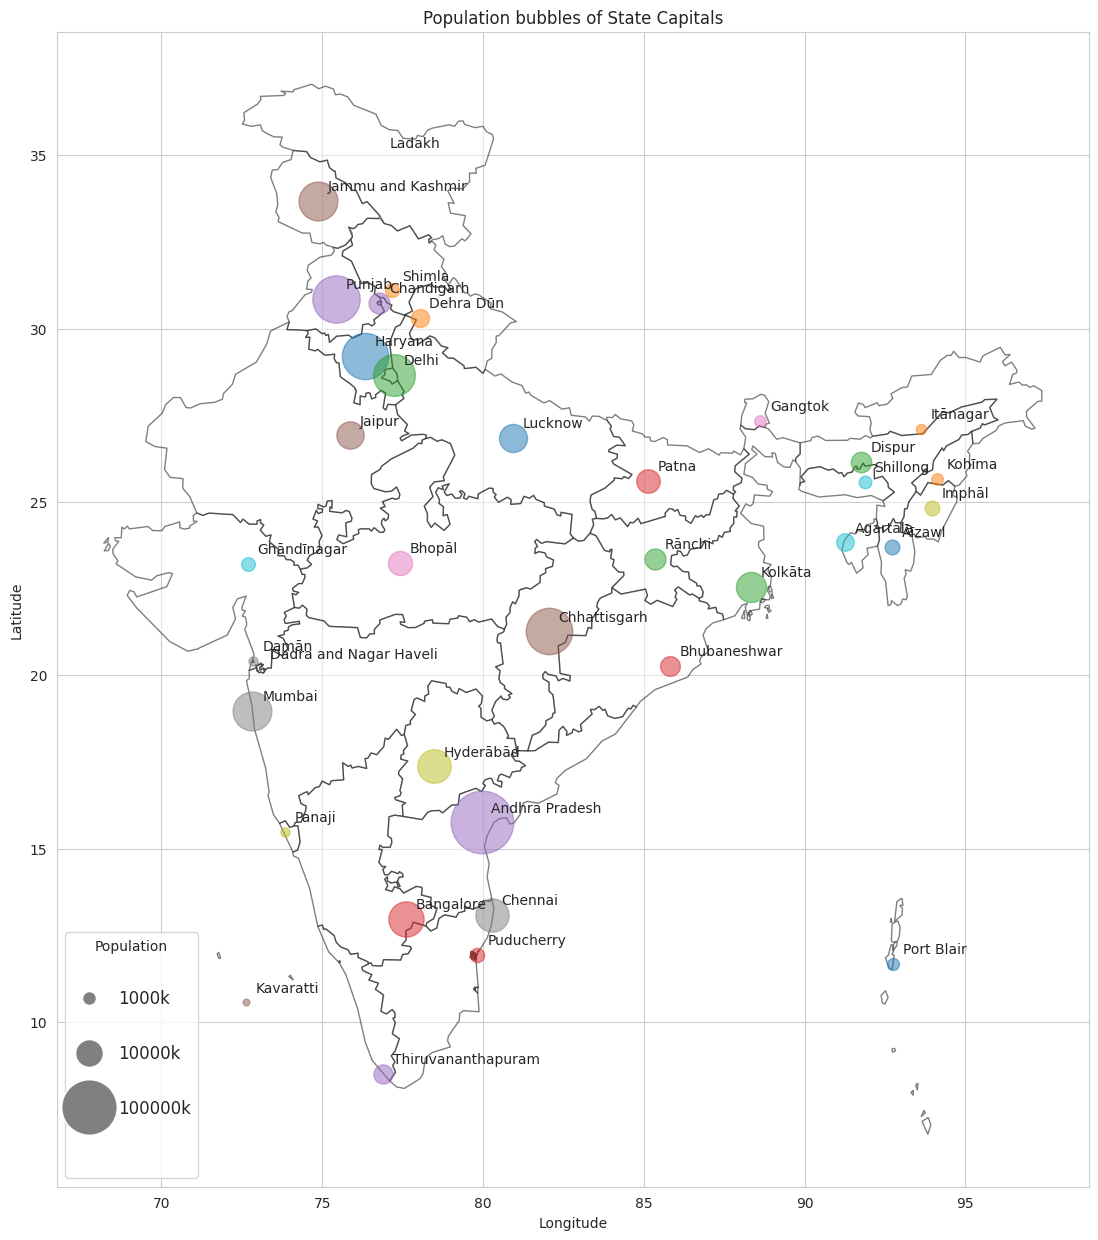

In [134]:
ig, ax = plt.subplots(figsize=(15,15))
india_map.plot(ax=ax, alpha=0.5, edgecolor='black', color='white')

# Create bubbles for each state capital
for i, row in india_data.iterrows():
    ax.scatter(row['cap_x'], row['cap_y'], s=np.sqrt(row['cap_popln'])*7, alpha=0.5)

# Add labels for state capitals
for i, row in india_data.iterrows():
    ax.annotate(
        row['capital'], 
        xy=(row['cap_x'], row['cap_y']), 
        xytext=(row['cap_x'] + 0.3, row['cap_y'] + 0.3)
    )

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='1000k', markerfacecolor='grey', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='10000k', markerfacecolor='grey', markersize=20),
    Line2D([0], [0], marker='o', color='w', label='100000k', markerfacecolor='grey', markersize=40),
    Circle((0, 0), 0, color='white', label=''),
]
ax.legend(handles=legend_elements, title="Population", loc='lower left', fontsize=12, labelspacing=2.2)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("Population bubbles of State Capitals")
plt.show()

# Question 2 (Airport Flight Conectivities)

## Loading Data

In [148]:
geolocator = Nominatim(user_agent="my-app")

In [149]:
# Load the population data
flight_sch = pd.read_csv('Data-Visualizations-Lab-3/FlightSchedule.csv', usecols = ['Origin','Destination', 'Days Of Operations'])
flight_sch.head()

,Origin,Destination,Days Of Operations
0,Abu Dhabi,Ahmedabad,"M,W,Th,F,Sa,Su"
1,Abu Dhabi,Ahmedabad,"W,F,Sa,Su"
2,Abu Dhabi,Ahmedabad,"Tu,W,F,Sa,Su"
3,Abu Dhabi,Ahmedabad,Daily
4,Abu Dhabi,Ahmedabad,"M,W,Th,F,Sa,Su"


In [150]:
flight_sch['working_days'] = 0
for i in range(flight_sch.shape[0]):
    days_of_op = flight_sch.iloc[i, 2]
    wd = 0
    if(days_of_op.lower()=="daily"):
        wd = 7
    else:
        wd = len(days_of_op.split(','))
    flight_sch.iloc[i, 3] = wd
flight_sch.drop(['Days Of Operations'], axis = 1, inplace=True)

In [151]:
flight_sch.head()

,Origin,Destination,working_days
0,Abu Dhabi,Ahmedabad,6
1,Abu Dhabi,Ahmedabad,4
2,Abu Dhabi,Ahmedabad,5
3,Abu Dhabi,Ahmedabad,7
4,Abu Dhabi,Ahmedabad,6


In [152]:
airport_cities = list(flight_sch['Origin'].value_counts().keys())
airport_cities.sort()
len(airport_cities)

36

In [153]:
def getLatLng(city_name):
    location = geolocator.geocode(city_name, timeout=100)
    print(city_name, location.latitude, location.longitude)
    return (location.latitude, location.longitude)

In [154]:
getLatLng(airport_cities[0])

Abu Dhabi 24.4538352 54.3774014


(24.4538352, 54.3774014)

In [155]:
# Create a dictionary of nodes and their coordinates
nodes = {}
for city in airport_cities:
    nodes[city] = getLatLng(city)

Abu Dhabi 24.4538352 54.3774014
Ahmedabad 23.0216238 72.5797068
Amritsar 31.6343083 74.8736788
Bagdogra 26.6988847 88.3200303
Bangkok 13.7524938 100.4935089
Bengaluru 12.9767936 77.590082
Chandigarh 30.72984395 76.78414567016054
Chennai 13.0836939 80.270186
Dammam 26.4367824 50.1039991
Dehra Dun 30.3255646 78.0436813
Delhi 28.6517178 77.2219388
Dubai 25.074282349999997 55.18853865430702
Goa 15.3004543 74.0855134
Goa-New Goa 15.486913 73.818794
Guwahati 26.1805978 91.753943
Hyderabad 17.360589 78.4740613
Jaipur 26.9154576 75.8189817
Jammu 32.7185614 74.8580917
Jeddah 21.5810088 39.1653612
Kannur 11.8763836 75.3737973
Kochi 9.9674277 76.2454436
Kolkata 22.5726459 88.3638953
Kuwait 29.2733964 47.4979476
Leh 34.1642029 77.5848133
Lucknow 26.8381 80.9346001
Mumbai 19.0785451 72.878176
Muscat 23.5882019 58.3829448
Nagpur 21.1498134 79.0820556
Patna 25.6093239 85.1235252
Phuket 7.9366015 98.3529292
Port Blair 11.6645348 92.7390448
Pune 18.521428 73.8544541
Ranchi 23.3700501 85.3250387
Srinaga

## Network Graph Plot

#### Airports

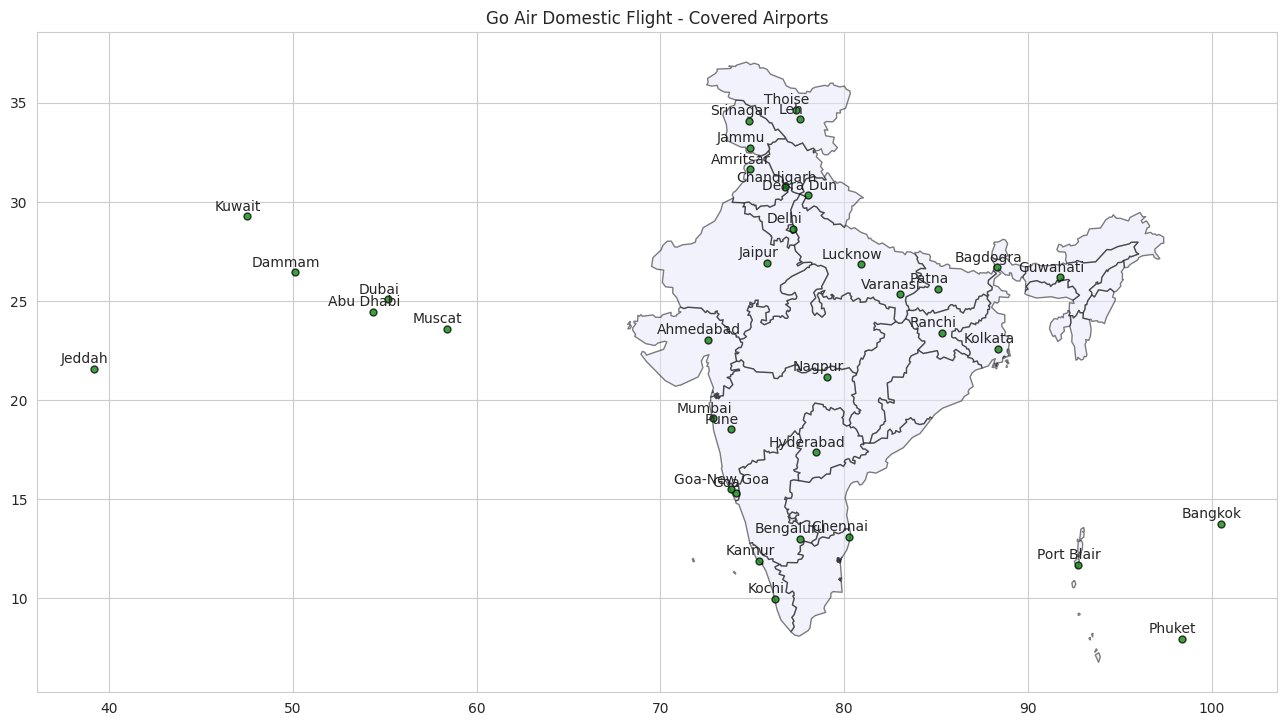

In [156]:
fig, ax = plt.subplots(figsize=(16,16))
india_data.plot(ax=ax, alpha=0.5, edgecolor='black', color='lavender')

for node, pos in nodes.items():
    plt.plot(pos[1], pos[0], 'o', markersize=5, markerfacecolor='green', markeredgecolor='black', alpha=0.75)
    plt.text(pos[1]-0.5, pos[0]+0.5, node, fontsize=10, ha='center', va='center')

ax.set_title('Go Air Domestic Flight - Covered Airports')

plt.show()

#### Flight Connectivities

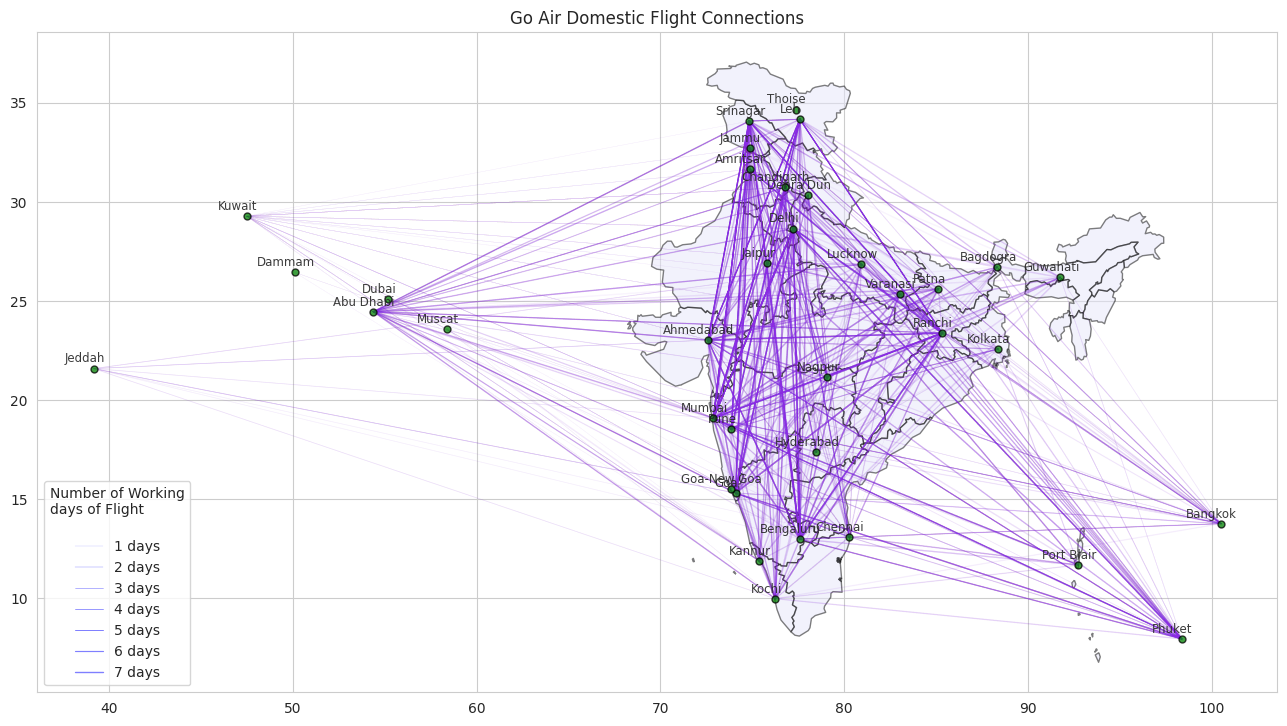

In [157]:
# Create a plot with the India shape
fig, ax = plt.subplots(figsize=(16,16))
india_data.plot(ax=ax, alpha=0.5, edgecolor='black', color='lavender')

# Plot the connections as lines with varying thickness
for i, sch in flight_sch.iterrows():
    start = nodes[sch['Origin']]
    end = nodes[sch['Destination']]
    weight = sch['working_days']
    plt.plot([start[1], end[1]], [start[0], end[0]], linewidth=weight/7, alpha=0.05, color='blueviolet')

# Plot the nodes as red circles
for node, pos in nodes.items():
    plt.plot(pos[1], pos[0], 'o', markersize=5, markerfacecolor='green', markeredgecolor='black', alpha=0.75)
    plt.text(pos[1]-0.5, pos[0]+0.5, node, fontsize=8.5, ha='center', va='center', alpha=0.9)

# Add a title and legend
ax.set_title('Go Air Domestic Flight Connections')
legend_handles = [plt.Line2D([0], [0], linewidth=weight/7, alpha=0.5, color='blue', label=f'{weight} days') for weight in range(1, 8)]
ax.legend(handles=legend_handles, title='Number of Working\ndays of Flight\n', loc='lower left', prop={'size': 10})

# Show the plot
plt.show()